In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import BatchNormalization,Dense, Reshape, Dropout # type: ignore
from tensorflow.keras.regularizers import l2
from keras import regularizers
import os
import pydot
from tensorflow.keras.utils import model_to_dot, plot_model
from IPython.display import SVG
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


## single peak

In [ ]:
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'sp_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=201
singlespec_loaded = loaded_data[:, :y_point]
Isingle_loaded = loaded_data[:, y_point:]

In [ ]:
#train, validation and test sets division
alpha=0.7
beta=0.8
inputs_all =Isingle_loaded
targets_all=singlespec_loaded
N=len(inputs_all)
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]

np.random.seed(13)
np.random.shuffle(inputs_train)
np.random.seed(13)
np.random.shuffle(targets_train)

np.random.seed(14)
np.random.shuffle(inputs_val)
np.random.seed(14)
np.random.shuffle(targets_val)

Epoch 1/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0040 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 2/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 3/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 4/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 5/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 6/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 7/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 8/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 9/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0024 - learning_rate: 0.0010
E

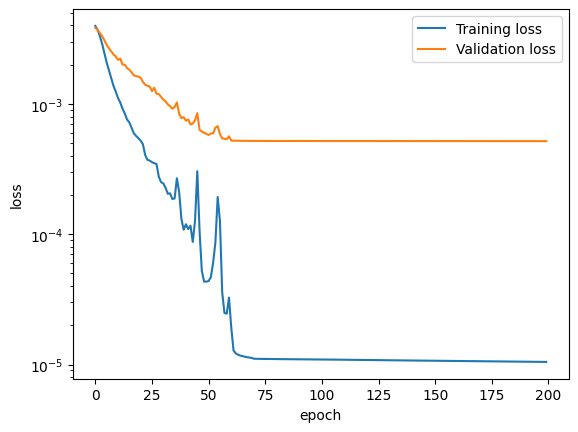

In [ ]:
model = Sequential()
model.add(Dense(150, input_dim=16, activation='relu',kernel_regularizer=l2(0.000)))
model.add(Dense(250, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(220, activation='relu'))
model.add(Dense(201))

model.compile(loss='mean_squared_error', optimizer='adamw')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=10, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=200, batch_size=32, validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
targets=targets_test
targets_pre=model.predict(inputs_test)
columns = np.arange(9, 190, 20)
positions1 = []
for col in columns:
    row_indices = np.where(targets[:, col] > 0.8)[0] 
    positions1.extend([(row, col) for row in row_indices])

columns = np.arange(8, 189, 20)
positions2 = []
for col in columns:
    row_indices = np.where(targets[:, col] > 0.8)[0] 
    positions2.extend([(row, col) for row in row_indices])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
columns = np.arange(10, 191, 20)
positions3 = []
for col in columns:
    row_indices = np.where(targets[:, col] > 0.8)[0] 
    positions3.extend([(row, col) for row in row_indices])
print(positions3)

[(np.int64(956), np.int64(10)), (np.int64(957), np.int64(10)), (np.int64(958), np.int64(10)), (np.int64(959), np.int64(10)), (np.int64(960), np.int64(10)), (np.int64(961), np.int64(10)), (np.int64(962), np.int64(10)), (np.int64(963), np.int64(10)), (np.int64(964), np.int64(10)), (np.int64(965), np.int64(10)), (np.int64(746), np.int64(50)), (np.int64(747), np.int64(50)), (np.int64(748), np.int64(50)), (np.int64(749), np.int64(50)), (np.int64(750), np.int64(50)), (np.int64(751), np.int64(50)), (np.int64(752), np.int64(50)), (np.int64(753), np.int64(50)), (np.int64(754), np.int64(50)), (np.int64(755), np.int64(50)), (np.int64(36), np.int64(110)), (np.int64(37), np.int64(110)), (np.int64(38), np.int64(110)), (np.int64(39), np.int64(110)), (np.int64(40), np.int64(110)), (np.int64(41), np.int64(110)), (np.int64(42), np.int64(110)), (np.int64(43), np.int64(110)), (np.int64(44), np.int64(110)), (np.int64(45), np.int64(110)), (np.int64(686), np.int64(110)), (np.int64(687), np.int64(110)), (np.i

37


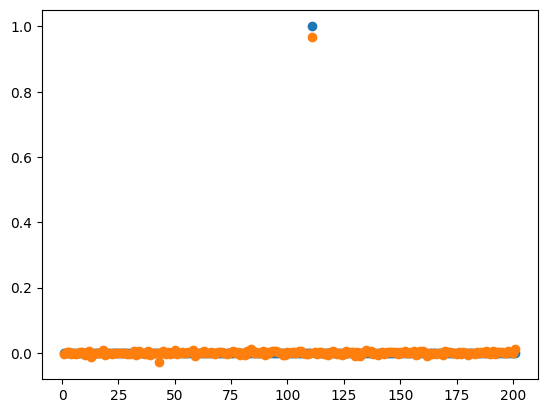

In [ ]:
positions_array1 = np.array(positions1)
positions_array2 = np.array(positions2)
positions_array3 = np.array(positions3)
L=np.arange(start=1,stop=y_point+1,step=1)
num1=9
num2=5
num=15
savetargets=np.random.rand(num,y_point)
savetargetspre=np.random.rand(num,y_point)
for i in range(num1):
    ith=positions_array1 [1+i*10,0]
    savetargets[i,:]=targets[ith,0:y_point]
    savetargetspre[i,:]=targets_pre[ith,0:y_point]
for i in range(num2):
    ith=positions_array2 [1+i*10,0]
    savetargets[i+num1,:]=targets[ith,0:y_point]
    savetargetspre[i+num1,:]=targets_pre[ith,0:y_point]
    
ith=positions_array3 [21,0]
savetargets[14,:]=targets[ith,0:y_point]
savetargetspre[14,:]=targets_pre[ith,0:y_point]

print(ith)
plt.figure(1)
plt.scatter(L,targets[ith,0:y_point])
plt.scatter(L,targets_pre[ith,0:y_point])

